importing the necessary libraries

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

showing the imported image on the colab notebook

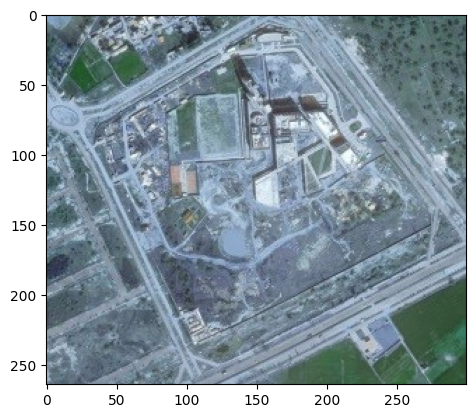

In [41]:
img = cv2.imread('Satellite Image Plaksha.jpg', cv2.IMREAD_COLOR)
plt.imshow(img)

converting the image to greyscale

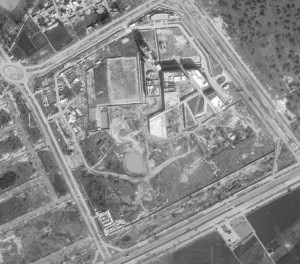

In [43]:
# greyscale image
g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(g_img)

converting the image to double for the mathematical operations

In [14]:
g_img.astype(np.float64)

array([[162., 169., 167., ..., 109., 112., 110.],
       [168., 169., 164., ..., 106., 107., 104.],
       [160., 176., 171., ..., 109., 113., 113.],
       ...,
       [191., 196., 159., ...,  74.,  73.,  70.],
       [136., 147., 130., ...,  74.,  72.,  72.],
       [136., 140., 133., ...,  71.,  67.,  67.]])

calculating the mean of each column in pixels and subtracting it from the image

In [16]:
for i in range(g_img.shape[0]):
  g_img[i] = g_img[i] - np.mean(g_img[i])

computing the covariance matrix

In [18]:
cov_mat = np.cov(g_img)
print(cov_mat)

[[1296.1929097  1091.50809365  886.14822742 ...  298.42675585
   230.69471572  210.2406689 ]
 [1091.50809365 1263.1509922   981.04263099 ...  270.11895206
   199.38911929  175.63736901]
 [ 886.14822742  981.04263099 1351.46938685 ...  238.77447046
   162.91286511  155.35910814]
 ...
 [ 298.42675585  270.11895206  238.77447046 ...  923.05992196
   824.11560758  778.48673356]
 [ 230.69471572  199.38911929  162.91286511 ...  824.11560758
   991.37306577  920.57917503]
 [ 210.2406689   175.63736901  155.35910814 ...  778.48673356
   920.57917503 1041.61132664]]


getting eigenvectors and eigenvalues

In [29]:
print(cov_mat.shape)
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
print(eigenvalues)
print(eigenvectors)

(264, 264)
[5.27244370e+04 2.91636753e+04 2.30126408e+04 1.90344405e+04
 1.52743033e+04 1.25683289e+04 1.03629095e+04 9.26165239e+03
 8.29677064e+03 7.12702285e+03 6.20673915e+03 5.49119885e+03
 4.60598386e+03 4.31762680e+03 4.16987312e+03 3.66820179e+03
 3.57062091e+03 3.36293967e+03 3.30450980e+03 3.25902331e+03
 2.91059579e+03 2.78774864e+03 2.45161974e+03 2.37772097e+03
 2.34171792e+03 2.18969758e+03 2.11658591e+03 2.06574791e+03
 2.00867567e+03 1.89027324e+03 1.81253075e+03 1.71593147e+03
 1.66336752e+03 1.54437988e+03 1.51792358e+03 1.46679402e+03
 1.37415011e+03 1.32083886e+03 1.31336265e+03 1.23531279e+03
 1.21921620e+03 1.12391394e+03 1.07434892e+03 1.06460561e+03
 1.02641210e+03 1.01651485e+03 1.00592310e+03 9.53839667e+02
 9.34958135e+02 9.07768027e+02 8.59856713e+02 8.49269909e+02
 8.27959083e+02 7.92594284e+02 7.61959217e+02 7.49284283e+02
 7.36331288e+02 6.99266919e+02 6.83003407e+02 6.68632140e+02
 6.52105383e+02 6.32193814e+02 6.25730455e+02 6.13817823e+02
 5.88928985e+

sorting by eigen values

In [33]:
i = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[i]
eigenvectors = eigenvectors[:,i]

print(eigenvectors)

[[-0.08086608 -0.01874512  0.10876357 ... -0.00273285 -0.00878513
  -0.03476259]
 [-0.07355629 -0.01552275  0.10030012 ... -0.0546136  -0.00884441
   0.04627472]
 [-0.06772272  0.00597753  0.1002533  ... -0.02802069  0.06006215
   0.08916298]
 ...
 [-0.01485297 -0.03196095  0.14238692 ... -0.07081648 -0.04542061
  -0.06845497]
 [-0.01392756 -0.02999269  0.14152445 ... -0.0673935   0.13024135
   0.02975344]
 [-0.01123551 -0.02788728  0.14636577 ...  0.07680897 -0.01679215
   0.12711472]]


defining number of principal components

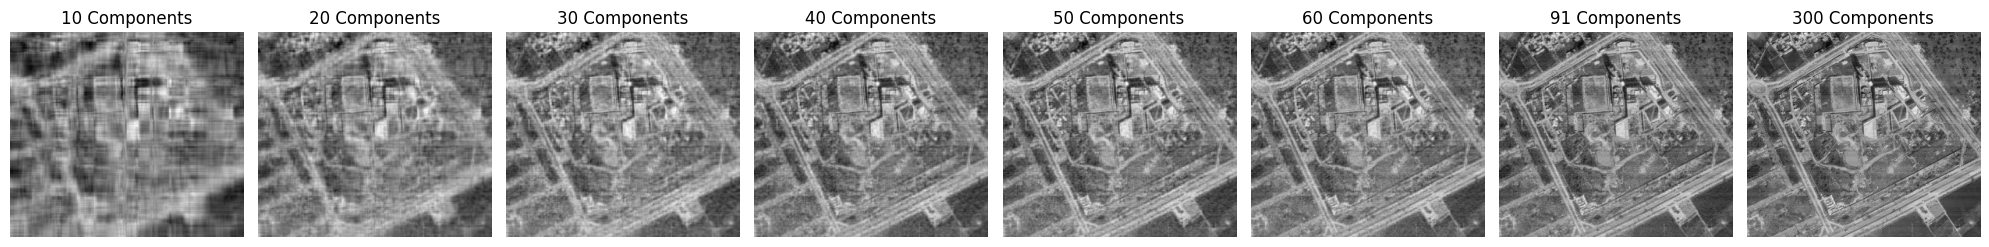

In [40]:
num_c = [10, 20, 30, 40, 50, 60, 91, 300]
output_images = []

original_shape = g_img.shape
flattened_image = g_img.reshape(-1, original_shape[1])
mean_column = np.mean(flattened_image, axis=0)
image_mean_subtracted = flattened_image - mean_column

cov_mat = np.cov(image_mean_subtracted, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

for num_components in num_c:
    selected_components = eigenvectors[:, :num_components]
    projected_data = np.dot(image_mean_subtracted, selected_components)
    reconstructed_image = np.dot(projected_data, selected_components.T) + mean_column
    output_images.append(reconstructed_image)

fig, axes = plt.subplots(1, len(num_c), figsize=(20, 5))

for i, (reconstructed, num_components) in enumerate(zip(output_images, num_c)):
    axes[i].imshow(reconstructed, cmap='gray')
    axes[i].set_title(f"{num_components} Components")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


checking variance of 91 dim using PCA function

In [39]:
from sklearn.decomposition import PCA
import numpy as np

original_shape = g_img.shape
flattened_image = g_img.reshape(-1, original_shape[1])
mean_column = np.mean(flattened_image, axis=0)
image_mean_subtracted = flattened_image - mean_column

num_components = 91
pca = PCA(n_components=num_components)
pca.fit(image_mean_subtracted)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print(f"Explained variance ratio for each component:\n{explained_variance_ratio}")
print(f"Cumulative explained variance with {num_components} components: {cumulative_variance[-1]:.2%}")


Explained variance ratio for each component:
[0.11391882 0.09725437 0.07942308 0.0636419  0.04832159 0.04006138
 0.03783233 0.03164473 0.02713585 0.02524543 0.01999201 0.01850009
 0.0172514  0.01409799 0.01388321 0.01251886 0.01232316 0.01135859
 0.01116132 0.01069034 0.00989025 0.00953512 0.00855298 0.00798292
 0.00786467 0.00771657 0.00724242 0.00702636 0.00668821 0.00641323
 0.00618259 0.00585372 0.0056763  0.0052255  0.00513726 0.00500376
 0.00461829 0.00443948 0.00437459 0.00418928 0.00410126 0.00399767
 0.00366599 0.00357959 0.00353562 0.00342549 0.00333979 0.00324008
 0.00320252 0.00295988 0.00290968 0.00283503 0.00280554 0.00268686
 0.0026137  0.00256046 0.00252609 0.00239581 0.00234632 0.00230217
 0.00223979 0.00216685 0.002106   0.00203755 0.00200859 0.00196793
 0.00190559 0.0018924  0.00184208 0.00178446 0.00174509 0.00171273
 0.00169944 0.00163514 0.00159812 0.00157611 0.00153143 0.00152302
 0.00142733 0.00139801 0.0013753  0.00135164 0.00133241 0.00130971
 0.00127638 0.001

Q1: What is the difference between PCA and Feature Selection?

  -> PCA is a dimensionality reduction technique which transforms the original features of the data into a new set of uncorrelated features which can be used to reduce to number of features.

  It captures the maximum variance in data and is an unsupervised technique.

  Feature selection can be either supervised or supervised learning and involves reducing the number of features by simply choosing the features relevant to the task.

Q2: Why do we standardize features before applying PCA?

  -> PCA is very sensitive, especially to the scale of the features as it relis on the covariance matric which depends on the feature values.

  Standardizing them means that everything will contribute equally to the analysis and prevents larger features with larger values from dominating the components

Q3: What is the importance of Covariance Matrix in PCA?

  -> Covavriance matrix is important as we can capture the the relation between features in the dataset.

  The eigenvectors and eigenvalues are calculated from the covariance matrix as well.

Q4: What are some limitations of PCA?

  -> Transformed features are linear combinations of our original features, which reduces the interpretability for us.

  If the relationship between the features is non-linear, then we cannot accurately capture them

  The process is highly sensitive to the scaling of the data.


Q5: How can we figure out the importance of individual PCs in PCA?

  -> We can do that using the following things -

      1.  Variance
      2. Eigenvalues and Eigenvectors